In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('data_raw.csv')

# Basic inspection

Variable inspection

In [3]:
len(data)

30931

In [4]:
data.columns

Index(['ticker', 'commodity', 'date', 'open', 'high', 'low', 'close',
       'volume'],
      dtype='object')

In [5]:
data['commodity'].unique()

array(['Cocoa', 'Coffee', 'Cotton', 'Random Length Lumber',
       'Orange Juice', 'Sugar'], dtype=object)

In [6]:
data.dtypes

ticker        object
commodity     object
date          object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [7]:
# check date format
data['date'][0]

'2000-01-03'

In [8]:
# convert 'date' to datetime
data['date'] = data['date'].apply(
    lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')
)
data.dtypes

ticker               object
commodity            object
date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [9]:
# check proportions of missing values
data.isnull().mean()

ticker       0.0
commodity    0.0
date         0.0
open         0.0
high         0.0
low          0.0
close        0.0
volume       0.0
dtype: float64

In [10]:
# basic statistics
data.describe()

,date,open,high,low,close,volume
count,30931,30931.000000,30931.000000,30931.000000,30931.000000,30931.000000
mean,2012-06-21 15:20:40.580647168,583.777636,590.417521,577.307662,583.800294,14145.303029
min,2000-01-03 00:00:00,4.960000,5.060000,4.940000,4.960000,0.000000
25%,2006-05-05 00:00:00,54.490000,55.000000,53.950001,54.485001,199.000000
50%,2012-07-06 00:00:00,128.449997,129.750000,126.900002,128.149994,5462.000000
75%,2018-08-31 00:00:00,370.200012,375.000000,365.675003,370.399994,18867.500000
max,2024-06-24 00:00:00,11967.000000,12261.000000,11132.000000,11878.000000,232949.000000
std,NaN,1017.162676,1031.166787,1004.080039,1018.151325,21296.520023


In [11]:
# use pivot to convert into wide form
data_reshape = data.pivot(index='date', columns='commodity', values='close')

# flatten indices
df_flattened = pd.DataFrame(data_reshape.to_records()).reset_index(drop=True).drop('date', axis=1)

# rename Random Length Lumber to Lumber
df_flattened = df_flattened.rename(columns={'Random Length Lumber': 'Lumber'})

# save 
df_flattened.to_csv('data_pivot.csv', index=False)

df_flattened

,Cocoa,Coffee,Cotton,Orange Juice,Lumber,Sugar
0,830.0,116.500000,51.070000,NaN,NaN,NaN
1,836.0,116.250000,50.730000,NaN,NaN,NaN
2,831.0,118.599998,51.560001,NaN,NaN,NaN
3,841.0,116.849998,52.080002,NaN,NaN,NaN
4,853.0,114.150002,53.959999,NaN,NaN,NaN
...,...,...,...,...,...,...
6157,9659.0,227.149994,69.940002,429.200012,NaN,18.980000
6158,9938.0,226.300003,71.029999,413.649994,NaN,18.920000
6159,9598.0,230.250000,70.849998,422.250000,NaN,18.889999
6160,8995.0,226.550003,68.190002,427.850006,NaN,18.969999


In [12]:
# check proportions of missing values (relative series lengths)
df_flattened.isnull().mean()

Cocoa           0.004057
Coffee          0.004544
Cotton          0.004219
Orange Juice    0.885751
Lumber          0.071243
Sugar           0.010549
dtype: float64

In [13]:
# basic statistics
df_flattened.describe()

,Cocoa,Coffee,Cotton,Orange Juice,Lumber,Sugar
count,6137.000000,6134.000000,6136.000000,704.000000,5723.000000,6097.000000
mean,2364.536907,130.917900,71.824317,249.909730,355.762345,14.865529
std,1079.284960,51.108526,24.868673,95.776543,192.646085,5.980774
min,674.000000,41.500000,28.520000,115.000000,138.100006,4.960000
25%,1728.000000,100.862499,56.150002,169.150002,251.000000,10.220000
50%,2358.000000,122.699997,67.889999,229.025002,309.299988,14.100000
75%,2807.000000,158.287502,82.510002,338.299988,373.700012,18.780001
max,11878.000000,304.899994,215.149994,487.200012,1686.000000,35.310001


# Distributions

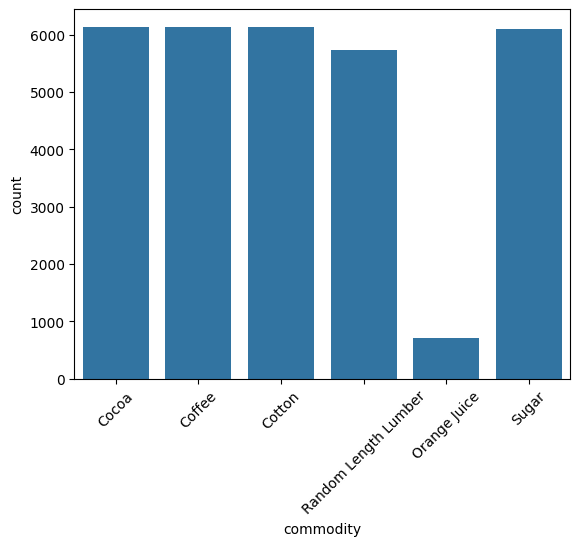

In [14]:
# compare sample sizes of different commodities
sns.countplot(x=data['commodity'], data=data)
plt.xticks(rotation=45)
plt.show()


In [15]:
# scale data

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df_flattened)
X = pd.DataFrame(X, columns=df_flattened.columns)

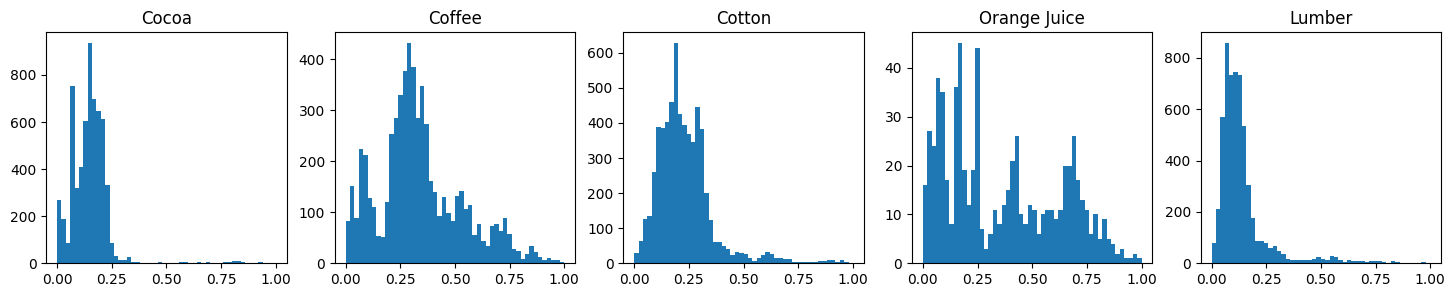

In [16]:
# plot histograms
fig, axes = plt.subplots(1, 5, figsize=(18, 3)) 

commodities = ['Cocoa', 'Coffee', 'Cotton', 'Orange Juice', 'Lumber', 'Sugar']

for col, ax in zip(commodities, axes.flat):
    ax.set_title(col)  
    ax.hist(X[col], bins = 50)

plt.show()

The distributions are multi-modal and highly skewed. 

# Similarity

We need to quantify the amount of similarity or association between the commodities. 

First, let's make sure that open, high, low, and close are identical measures.

<Axes: >

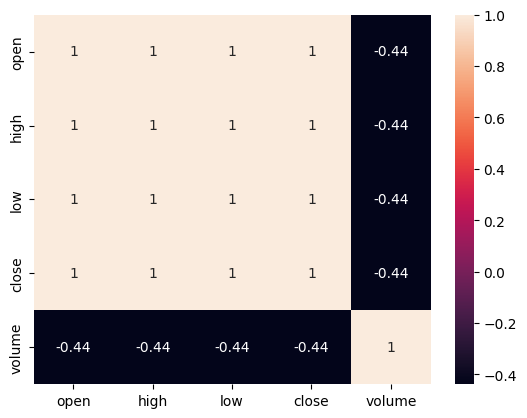

In [24]:
cor = data[['open', 'high', 'low', 'close', 'volume']].corr(method='spearman')
sns.heatmap(cor, annot=True)

Indeed they are. We'll arbitrarily choose close are our comparison value. 

### Line plot

Let's simply plot the close values against time.

Text(0.5, 1.0, 'All commodities close values for all dates')

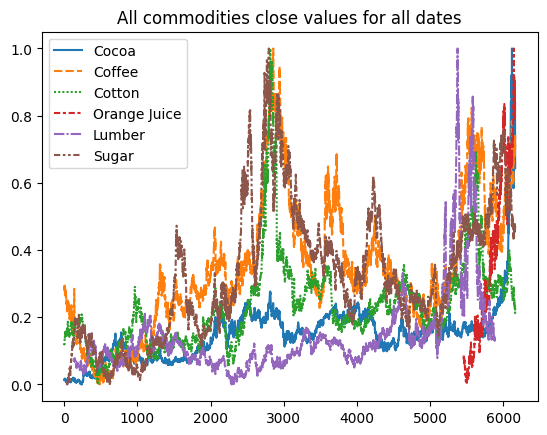

In [29]:
sns.lineplot(data=X, estimator=None)
plt.title('All commodities close values for all dates')

There definitely looks to be some similarity between coffee, cotton, and lumber. 

<Axes: >

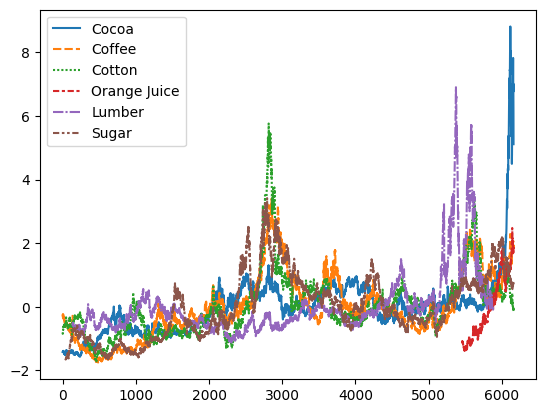

In [61]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_flattened)
X = pd.DataFrame(X, columns=df_flattened.columns)
sns.lineplot(data=X, estimator=None)

### Correlation

Let's look at the scatter plots of different commodities.

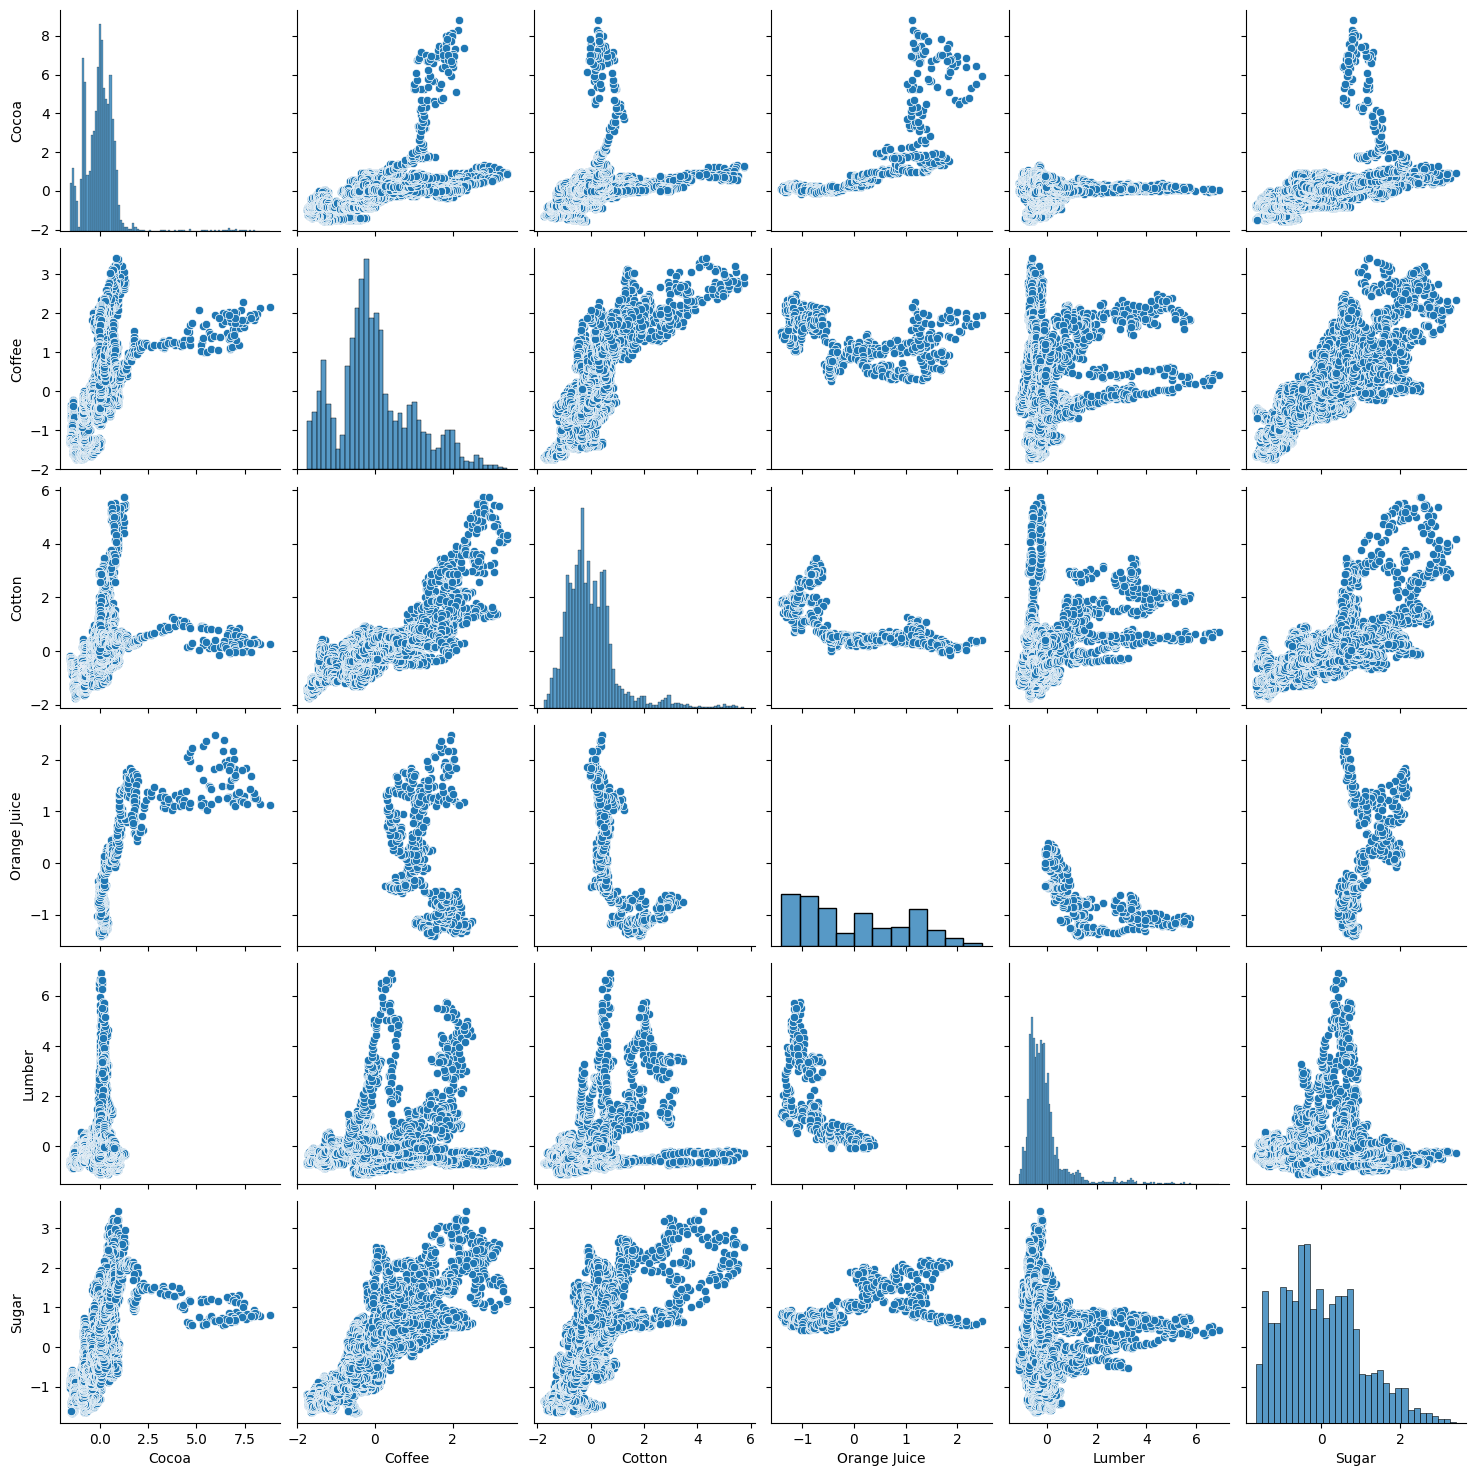

In [62]:
sns.pairplot(X)

Man these scatterplots look so weird. A few relationships for sure, but nothing linear. Let's create a correlation heatmap, though we can't expect all associations to be monotonic, and thus spearman correlation isn't an ideal measure.

                 Cocoa    Coffee    Cotton  Orange Juice    Lumber     Sugar
Cocoa         1.000000  0.694032  0.560314      0.803799 -0.007413  0.687014
Coffee        0.694032  1.000000  0.757726     -0.477208  0.133246  0.853414
Cotton        0.560314  0.757726  1.000000     -0.728505  0.338711  0.734223
Orange Juice  0.803799 -0.477208 -0.728505      1.000000 -0.794215  0.600630
Lumber       -0.007413  0.133246  0.338711     -0.794215  1.000000  0.114838
Sugar         0.687014  0.853414  0.734223      0.600630  0.114838  1.000000


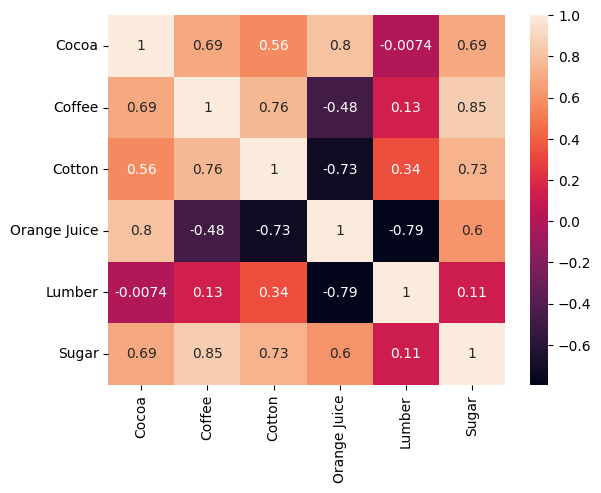

In [63]:
cor = X.corr(method='spearman')
sns.heatmap(cor, annot=True)
print(cor)

There's definitely something here, but we need more advanced methods of comparison. Interestingly, we're getting some high coefficients for orange juice. Looking at the line plot, this seems to be because orange juice is so short relative to the other series that correlation is capturing a relationship which doesn't actually exist.

### Dynamic time warping

This is a far more robust measure of similarity between time series. It shifts the values to account for different speeds between series or shifts that occur at different times. It's often applied to financial data. 

In [71]:
import itertools
from sktime.distances import dtw_distance

# get all non-redundant pairs of commodities
pairs = list(itertools.combinations(commodities, 2))

# dict to store distances
distances = {}

for pair in pairs:
    # convert to np arrays
    # it's ok if some NaNs are removed from different indices between series because DTW is very robust against small differences in sequence
    series_1 = X[pair[0]].dropna().values
    series_2 = X[pair[1]].dropna().values

    # make series equal lengths
    # if comparing with lumber, truncate from end; otherwise, truncate from start
    min_length = min(len(series_1), len(series_2))
    if pair[0] == 'Lumber' or pair[1] == 'Lumber':
        series_1 = series_1[:min_length]
        series_2 = series_2[:min_length]
    else:
        series_1 = series_1[-min_length:]
        series_2 = series_2[-min_length:]

    # get the distance score
    distance = dtw_distance(series_1, series_2)
    distances[pair] = distance

distances

{('Cocoa', 'Coffee'): np.float64(96.16190116760289),
 ('Cocoa', 'Cotton'): np.float64(74.7877331113279),
 ('Cocoa', 'Orange Juice'): np.float64(2.038947242866773),
 ('Cocoa', 'Lumber'): np.float64(36.320839859893276),
 ('Cocoa', 'Sugar'): np.float64(90.71599194555505),
 ('Coffee', 'Cotton'): np.float64(26.38650448276514),
 ('Coffee', 'Orange Juice'): np.float64(61.97199735531746),
 ('Coffee', 'Lumber'): np.float64(33.09853896689558),
 ('Coffee', 'Sugar'): np.float64(12.38884821898834),
 ('Cotton', 'Orange Juice'): np.float64(46.75271065552675),
 ('Cotton', 'Lumber'): np.float64(5.980373717869937),
 ('Cotton', 'Sugar'): np.float64(20.33409007429118),
 ('Orange Juice', 'Lumber'): np.float64(98.52982473503774),
 ('Orange Juice', 'Sugar'): np.float64(41.577168671853116),
 ('Lumber', 'Sugar'): np.float64(23.547760220559766)}

Unfortunately, determining what is a high or low distance can be quite arbitrary. We'll have to evaluate them in relation to the scale of distances that we have in our dataset. 

The distances range from 2 (most similar) to 98 (least similar). 

The most similar are:
- Cocoa/orange juice: 2 
- Cotton/lumber: 5
- Coffee/sugar: 12
- Cotton/sugar: 20
- Lumber/sugar: 23
- Coffee/lumber: 33
- Cocoa/lumber: 36

We'll disregard any associations with orange juice since that series is just too short to be meaningful.<br>
Cocoa, cotton, coffee, sugar, and lumber seem to be related. Of these, cocoa is the least related. This just leaves out orange juice, which we're disregarding anyway. This indicates that all our commodities might be useful features for predicting each other. 

# Linearity and stationarity

## Linearity

To determine if the time series are linear, we'll fit linear regression models and evaluate the goodness of fit using R<sup>2</sup> and the residuals. 

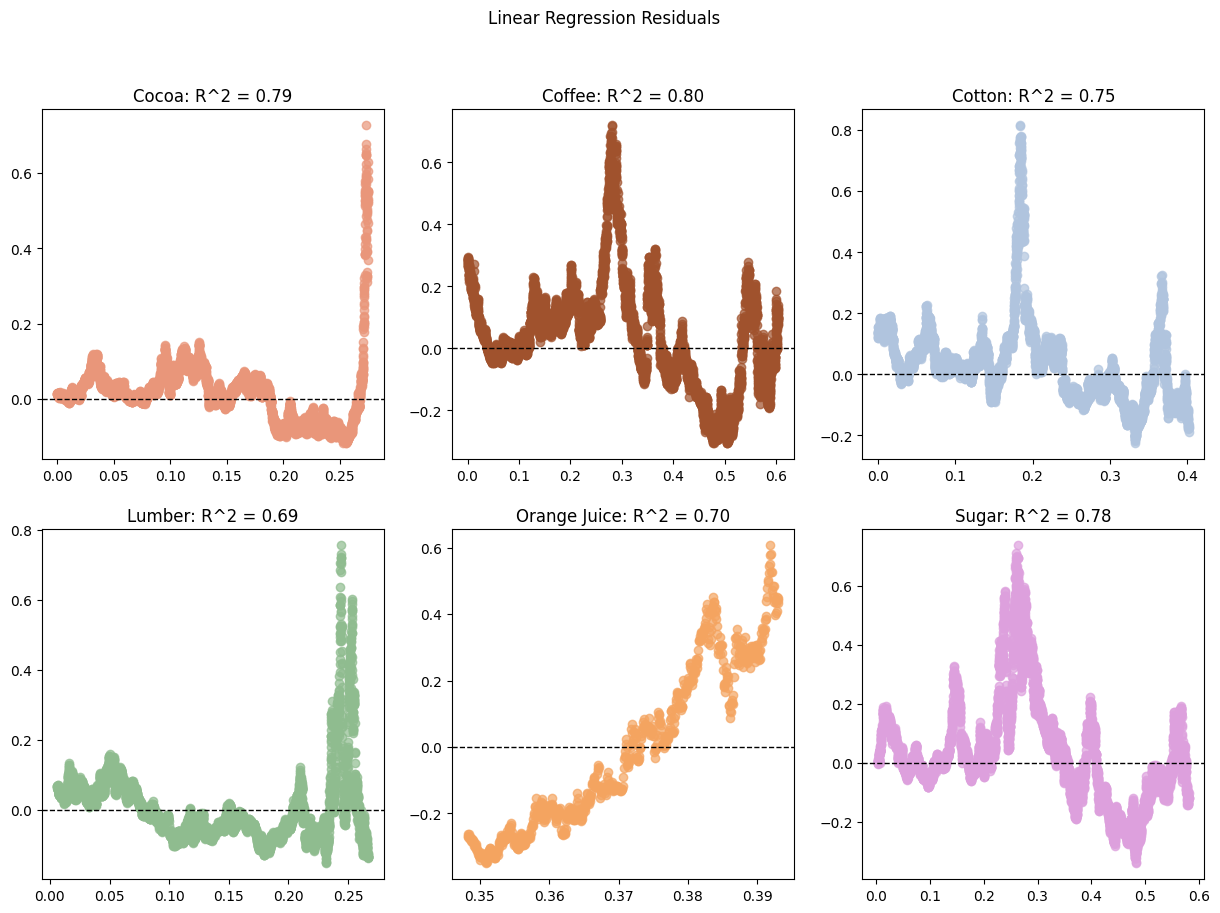

In [74]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# add an intercept column
X_const = sm.add_constant(X)

# use a series of integers for the exog data
idx = np.arange(1, len(X)+1)

commodities = ['Cocoa', 'Coffee', 'Cotton', 'Lumber', 'Orange Juice', 'Sugar']
colors = ['darksalmon', 'sienna', 'lightsteelblue', 'darkseagreen', 'sandybrown', 'plum']

# for each commodity, fit linear regression and plot residuals

# create figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
plt.suptitle('Linear Regression Residuals')

for commodity, ax, color in zip(commodities, axes.flat, colors):

    # fit linear regression
    model = OLS(endog = X_const[commodity], exog = idx, missing='drop').fit()

    # get R^2
    r_squared = model.rsquared
    r_squared = f'{r_squared:.2f}' # format for axis titles

    # get residuals
    fitted = model.fittedvalues  
    residuals = model.resid

    # plot residuals
    ax.scatter(fitted, residuals, alpha=0.7, color=color)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)  # horizontal line at y=0
    ax.set_title(f'{commodity}: R^2 = {r_squared}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    

Clearly, none of these are linear at all.

## Stationarity

Let's plot the autocorrelation.

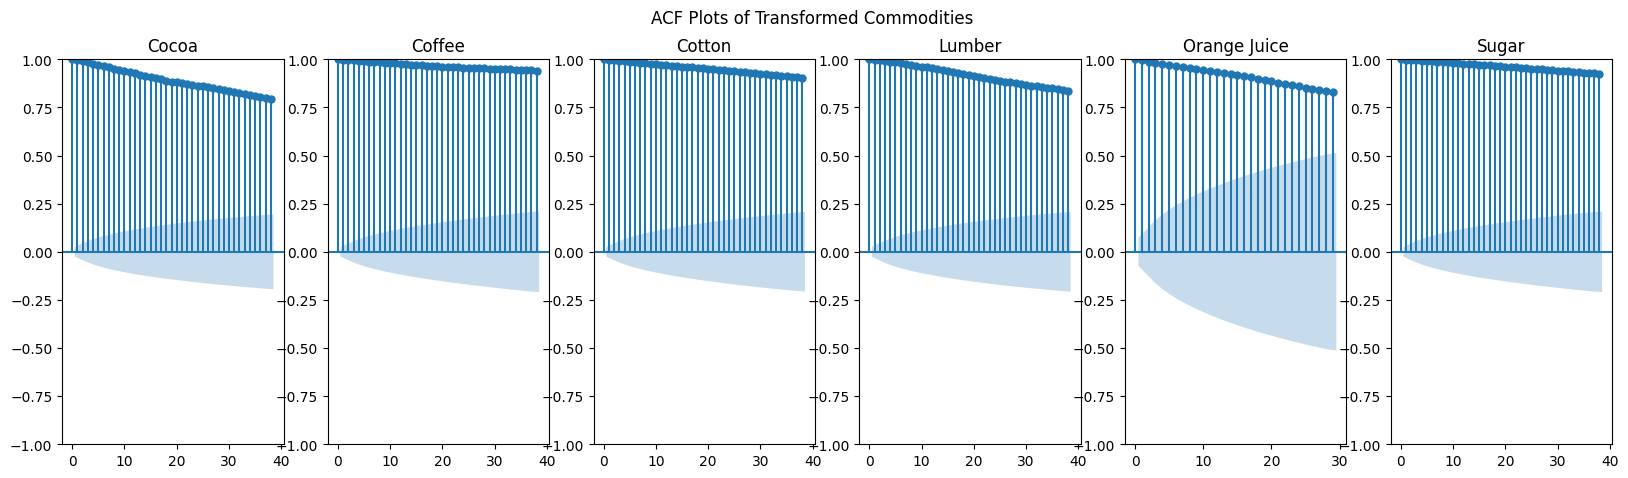

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
fig.suptitle('ACF Plots of Transformed Commodities')

for col, ax in zip(commodities, axes.flat):
    plot_acf(X[col].dropna(), ax=ax)
    ax.set_title(col)
plt.show()

These are not stationary. 

# Decomposition

We'll use STL decomposition because it's suitable for non-linear and non-stationary time series, and it's also robust to outliers and changing periodicity. 

First, we need to determine the period of our series. The period isn't clear from visual inspection, so we'll use a couple of additional methods. First, a fourier transform.

In [77]:
# Fourier transform

from scipy.fft import fft

print('Estimated period:')

for col in commodities:
    N = len(X[col].dropna())
    fft_vals = np.abs(fft(X[col].dropna()))
    frequencies = np.fft.fftfreq(N)

    dominant_frequency = np.argmax(fft_vals[1:]) + 1
    period = N / dominant_frequency
    print(f"{col}: {int(period)}")

Estimated period:
Cocoa: 6137
Coffee: 3067
Cotton: 3068
Lumber: 5723
Orange Juice: 704
Sugar: 3048


The estimated periods are just the entire length of the series or half of the series. That's not useful. Now for spectral density plots.

C:\Users\Melanie\AppData\Local\Temp\ipykernel_22936\3978954225.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1 / frequencies, power, color = color)


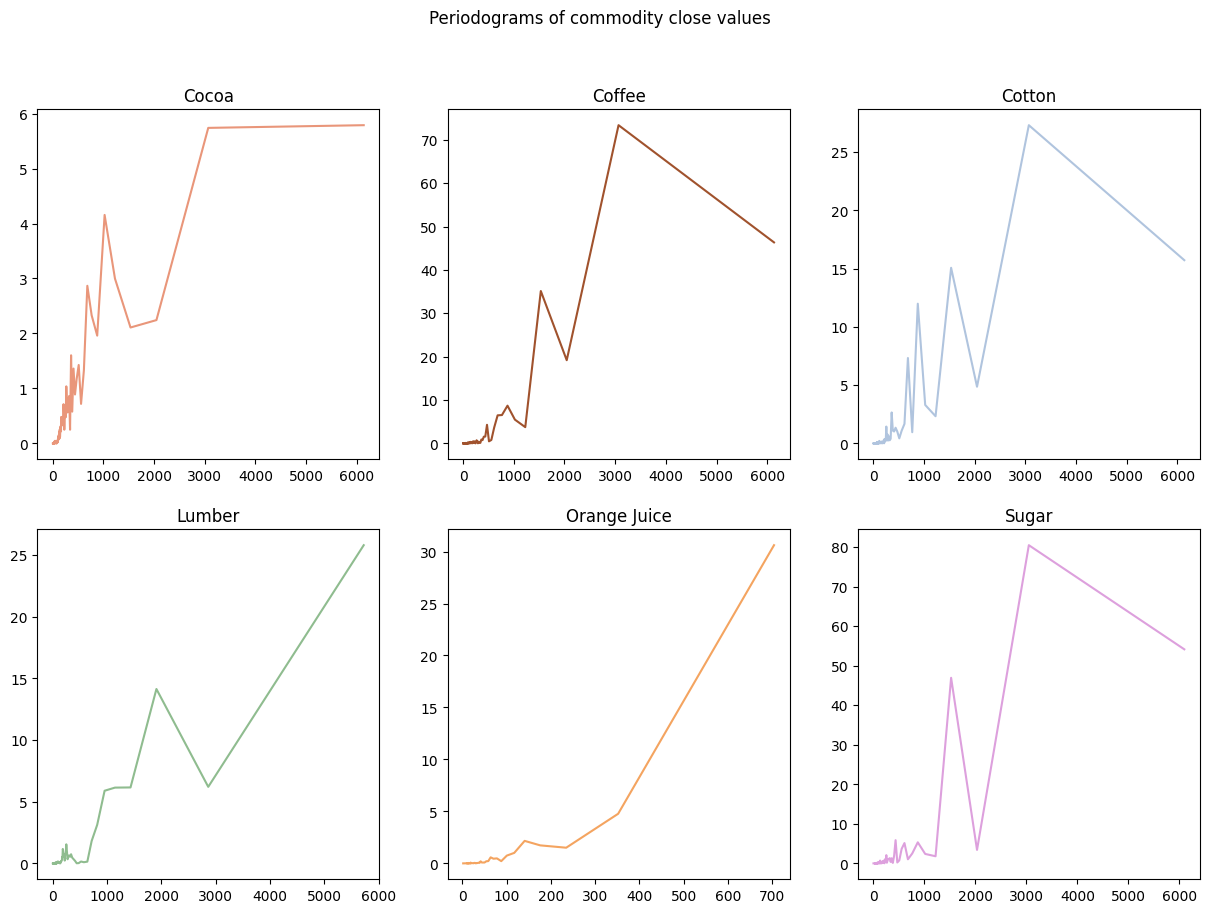

In [79]:
# spectral density plot

from scipy.signal import periodogram

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
plt.suptitle('Periodograms of commodity close values')

for commodity, ax, color in zip(commodities, axes.flat, colors):
    frequencies, power = periodogram(X[commodity].dropna())
    ax.plot(1 / frequencies, power, color = color)
    ax.set_title(commodity)
plt.show()


None of the commodities appear to have any consistent periodicity, and may be aperiodic. This means that date-derived features like seasons or months might not have any use as predictors. 

There are still several decomposition methods we can try. STL produces intuitive results, but EMD and SSA may reduce noise more effectively.

#### STL (Seasonal-Trend Decomposition Using LOESS)

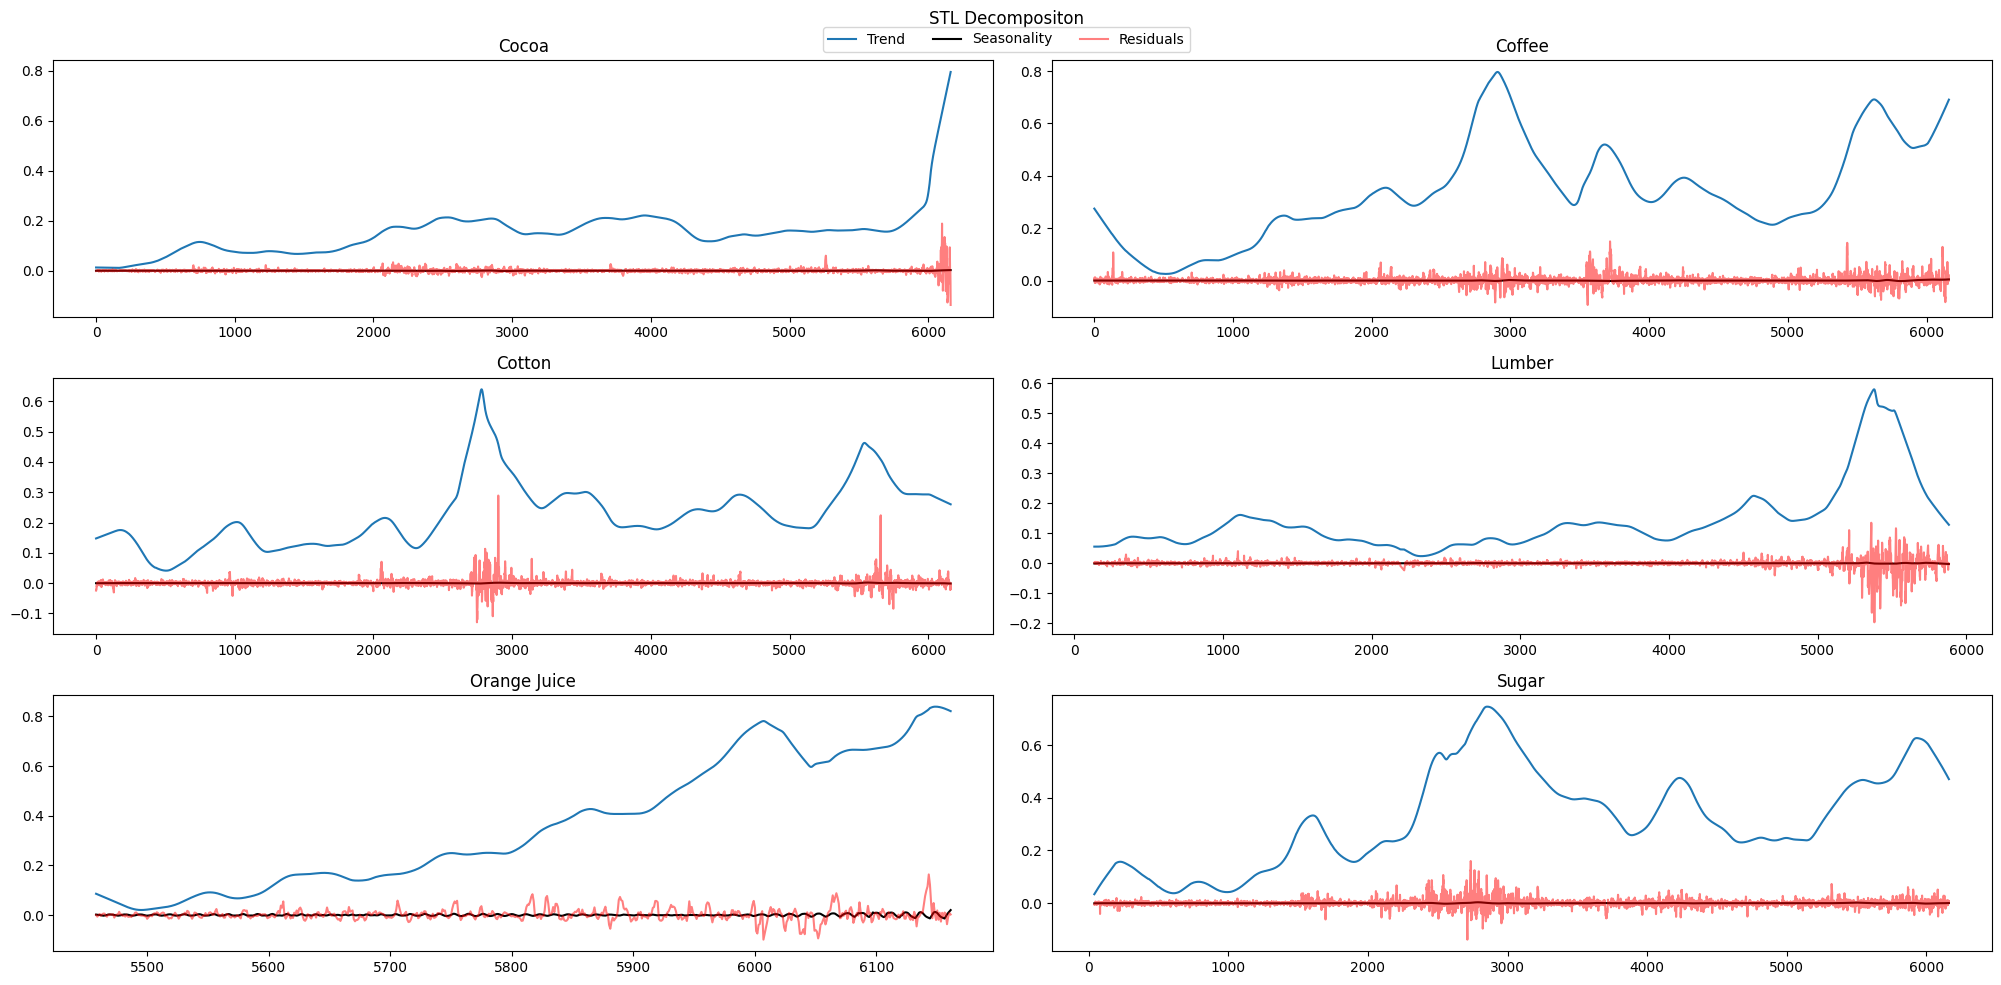

In [81]:
from statsmodels.tsa.seasonal import STL
from statsmodels.nonparametric.smoothers_lowess import lowess

# create plt figure
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('STL Decompositon')

# for each commodity and axis in the figure
for commodity, ax in zip(commodities, axes.flat):
    
    # get the series for the current commodity
    data = X[commodity].dropna()

    # STL decomposition
    stl = STL(data, period=12, seasonal=25, robust=True)
    stl_fit = stl.fit()
    stl_trend = stl_fit.trend
    stl_season = stl_fit.seasonal
    stl_resid = stl_fit.resid

    # smooth the trend
    frac = 0.05  # smoothing factor (larger = smoother)
    stl_trend_smooth = lowess(stl_trend, np.arange(len(stl_trend)), frac=frac)[:, 1]
    stl_trend_smooth = pd.Series(stl_trend_smooth) #convert from np to series for plotting
    stl_trend_smooth.index = data.index #align indices for plotting

    # smooth the seasonality
    frac = 0.01
    stl_season_smooth = lowess(stl_season, np.arange(len(stl_season)), frac=frac)[:, 1]
    stl_season_smooth = pd.Series(stl_season_smooth) #convert from np to series for plotting
    stl_season_smooth.index = data.index #align indices for plotting
    stl_resid.index = data.index #align indices for plotting
    
    # plot components
    ax.plot(stl_trend_smooth, label='Trend')
    ax.plot(stl_season_smooth, color='black', label='Seasonality')
    ax.plot(stl_resid, alpha=0.5, color='red', label='Residuals')
    ax.set_title(commodity)
    ax.set_xlabel('')
            
# create legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=3)

plt.tight_layout()
plt.show()

Orange juice is the only series with a consistent trend and seasonality, and even then the seasonality is very small. All the commodities are very irregular, and orange juice may not even be long enough for the irregularities to appear. 

#### SSA (Singular Spectrum Analysis)

In [ ]:
from pyts.decomposition import SingularSpectrumAnalysis

# We decompose the time series into three subseries
window_size = 15
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(X[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

#### EMD (Empirical Mode Decomposition)